<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Codes_in_Evaluation/Filtros_sugar_abril_16_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import os 
import cv2
import zipfile
import numpy as np

In [ ]:
!wget http://ftp.feq.ufu.br/ubirajara/TesteSugarAbr25.zip

--2019-06-05 02:15:39--  http://ftp.feq.ufu.br/ubirajara/TesteSugarAbr25.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158733 (155K) [application/zip]
Saving to: ‘TesteSugarAbr25.zip.4’

TesteSugarAbr25.zip 100%[===================>] 155.01K   159KB/s    in 1.0s    

2019-06-05 02:15:40 (159 KB/s) - ‘TesteSugarAbr25.zip.4’ saved [158733/158733]



In [ ]:
file_name = zipfile.ZipFile('TesteSugarAbr25.zip', 'r')
file_name.extractall()

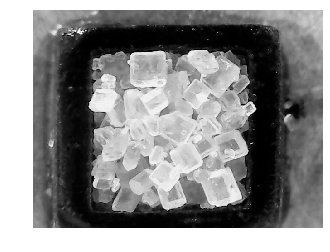

In [ ]:
# all images are load in variable x...
FILE='TesteSugarAbr25.zip'
img_name=[]
x=[]

with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        #x.append(cv2.cvtColor(cv2.imread(name), cv2.COLOR_BGR2RGB))
        #x.append(cv2.cvtColor(cv2.imread(name), cv2.COLOR_BGR2GRAY))
        x.append(cv2.cvtColor(cv2.imread(name), cv2.COLOR_RGB2GRAY))

plt.axis("off")
plt.imshow(x[0], cmap = "gray")        

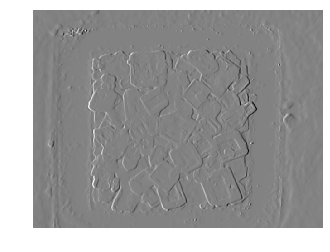

In [ ]:
sobelx = cv2.Sobel(x[0],cv2.CV_64F,1,0,ksize=5)  # x
plt.axis("off")
plt.imshow(sobelx, cmap = "gray")

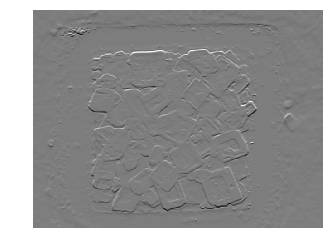

In [ ]:
sobely = cv2.Sobel(x[0],cv2.CV_64F,0,1,ksize=5)  # y
plt.axis("off")
plt.imshow(sobely, cmap = "gray")

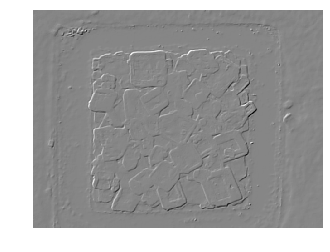

In [ ]:
sobel = sobelx + sobely
plt.axis("off")
plt.imshow(sobel, cmap = "gray")

In [ ]:
#gray = cv2.cvtColor(x[0], cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(x[0],(3,3),0)

In [ ]:
#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

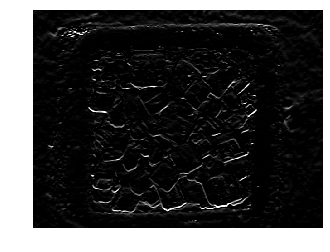

In [ ]:
#prewitt
#cv2.imshow("Prewitt X", img_prewittx)
plt.axis("off")
plt.imshow(img_prewittx, cmap = "gray")


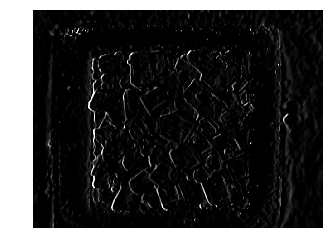

In [ ]:
#prewitt
plt.axis("off")
plt.imshow(img_prewitty, cmap = "gray")


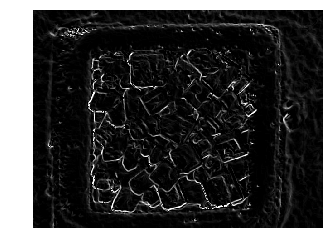

In [ ]:
#cv2.imshow("Prewitt", img_prewittx + img_prewitty)
plt.axis("off")
plt.imshow(img_prewittx + img_prewitty, cmap = "gray")

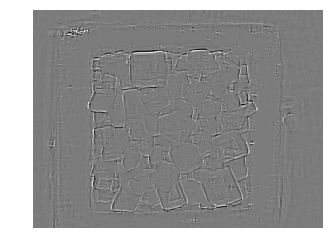

In [ ]:
#Prewitt no sobel
img_gaussian = cv2.GaussianBlur(sobel,(3,3),0)
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
plt.axis("off")
plt.imshow(img_prewittx + img_prewitty, cmap = "gray")